In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr

Data Preparation

In [2]:
dataset = pd.read_csv("/Users/Jia/Downloads/data_skripsi/uji_data/merged_data_all.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  300 non-null    int64  
 1   KABKOT      300 non-null    object 
 2   month       300 non-null    int64  
 3   year        300 non-null    int64  
 4   time        300 non-null    object 
 5   longitude   300 non-null    float64
 6   latitude    300 non-null    float64
 7   tb          300 non-null    int64  
 8   pm2p5       300 non-null    float64
 9   pm10        300 non-null    float64
 10  so2         300 non-null    float64
 11  rh          300 non-null    float64
 12  tp          300 non-null    float64
dtypes: float64(7), int64(4), object(2)
memory usage: 30.6+ KB


In [3]:
dataset = dataset.drop(['Unnamed: 0'],axis=1)
dataset

,KABKOT,month,year,time,longitude,latitude,tb,pm2p5,pm10,so2,rh,tp
0,JAKARTA BARAT,1,2018,2018-01-01,106.750000,-6.158333,773,32.990347,47.294950,63.577458,81.914160,7.256567
1,JAKARTA BARAT,2,2018,2018-02-01,106.750000,-6.158333,606,39.145521,55.981318,69.896251,85.607633,9.965402
2,JAKARTA BARAT,3,2018,2018-03-01,106.750000,-6.158333,721,44.443065,63.225958,88.287051,83.613396,7.343809
3,JAKARTA BARAT,4,2018,2018-04-01,106.750000,-6.158333,761,61.214024,86.887396,106.559957,83.669416,6.208611
4,JAKARTA BARAT,5,2018,2018-05-01,106.750000,-6.158333,737,68.229752,96.986573,118.133671,80.346159,2.895800
...,...,...,...,...,...,...,...,...,...,...,...,...
295,JAKARTA UTARA,8,2022,2022-08-01,106.891667,-6.125000,749,60.172357,85.524501,104.867688,79.779854,2.435247
296,JAKARTA UTARA,9,2022,2022-09-01,106.891667,-6.125000,786,61.185956,87.035939,100.019642,80.356575,4.522162
297,JAKARTA UTARA,10,2022,2022-10-01,106.891667,-6.125000,833,49.726068,70.626910,92.417571,82.717352,8.589306
298,JAKARTA UTARA,11,2022,2022-11-01,106.891667,-6.125000,741,46.806576,66.740500,89.921922,82.045862,5.543476


(Nope!) Pearson Correlation

In [4]:
# Assuming the Correlation variables
variables_tb = ['tb','pm2p5','pm10','so2','rh','tp']

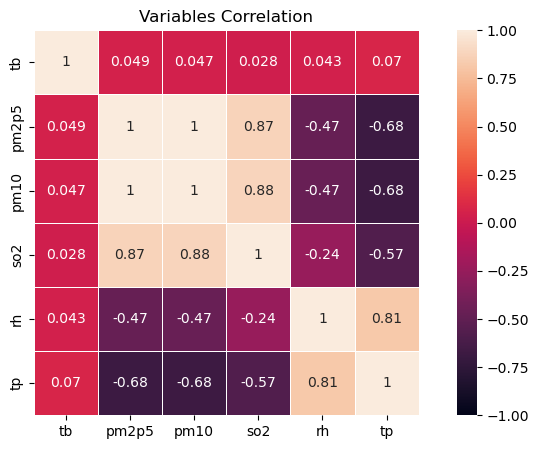

In [5]:
# correlation matrix
corr_matrix = dataset[variables_tb].corr()

# Correlation between all variable with TB in Jakarta 2018-2022
plt.figure(figsize=(10, 5))
plt.title("Variables Correlation")
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5,  vmin=-1, vmax=1)
plt.show()

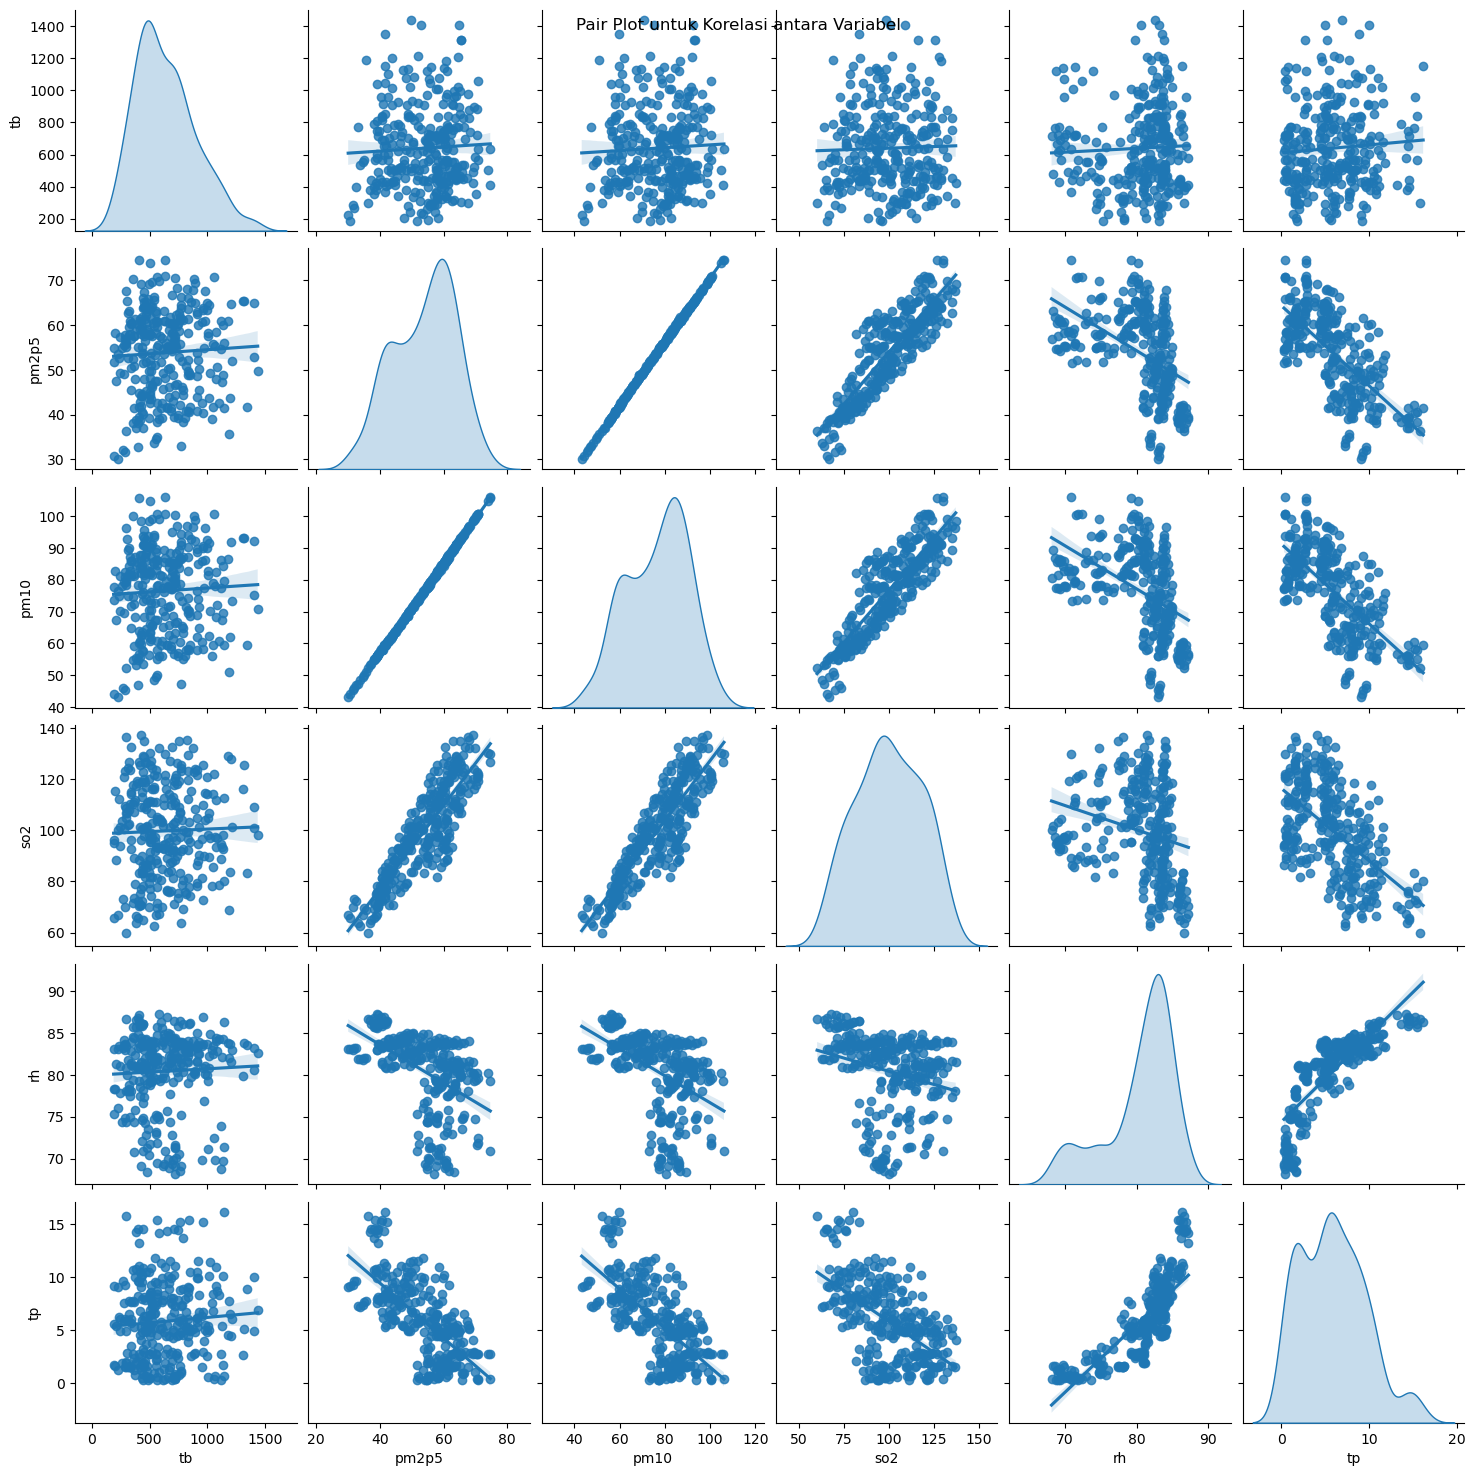

In [6]:
sns.pairplot(dataset[variables_tb], kind="reg", diag_kind="kde")
plt.suptitle("Pair Plot untuk Korelasi antara Variabel")
plt.show()

Spearman's rho Correlation

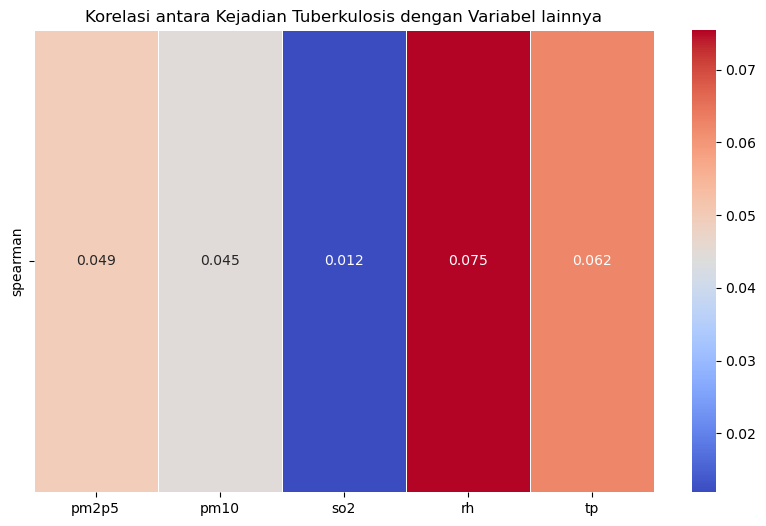

In [15]:
# koefisien korelasi (r) dan kuat hubungan (+/-)

variables = ['pm2p5','pm10','so2','rh','tp']
df_spearman = pd.DataFrame(index=['spearman'],columns=variables,)
df_corr_spearman = pd.DataFrame(index=['spearman'],columns=variables)

for variable in variables :
    spearmanr_corr,p_value = spearmanr(dataset['tb'],dataset[variable])
    df_spearman.at['spearman',variable]=spearmanr_corr
    df_corr_spearman.at['spearman',variable]=p_value  #rumus p-value
    
plt.figure(figsize=(10,6))
sns.heatmap(df_spearman.astype(float),annot=True,cmap='coolwarm', fmt='.3f', linewidths=.7)
plt.title('Korelasi antara Kejadian Tuberkulosis dengan Variabel lainnya')
plt.show()

# r = 0,00-0,20 → hubungan sangat lemah 
# r = 0,21-0,40 → hubungan lemah
# r = 0,41-0,70 → hubungan sedang
# r = 0,71-0,90 → hubungan kuat
# r = 0,91-0,99 → hubungan sangat kuat

In [17]:
# print hasil p-value untuk signifikan/tidak nya hubungan
# signifikan jika <0.05

df_corr_spearman = df_pvalue_spearman

print(df_pvalue_spearman)

             pm2p5      pm10       so2        rh        tp
spearman  0.394166  0.442482  0.837764  0.192609  0.281824


(Nope!) Spearman's rho Correlation by KABKOT

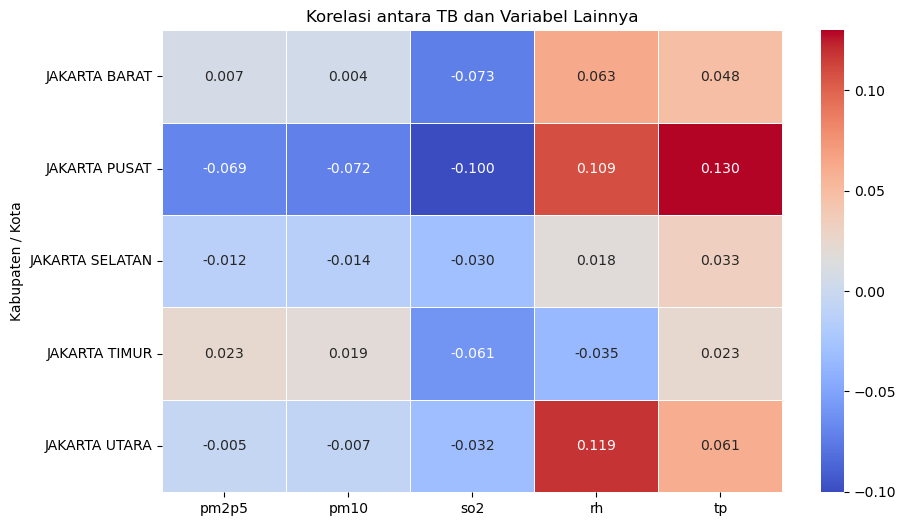

In [9]:
variables = ['pm2p5','pm10','so2','rh','tp']
areas = dataset['KABKOT'].unique()

df_corr_kabkot = pd.DataFrame(index=[areas],columns=variables)
df_pvalue_kabkot = pd.DataFrame(index=[areas],columns=variables)

for variable in variables:
    for area in areas:
        spearmanr_corr, p_value = pearsonr(dataset[dataset['KABKOT'] == area]['tb'], dataset[dataset['KABKOT'] == area][variable])
        df_corr_kabkot.at[area,variable]=spearmanr_corr
        df_pvalue_kabkot.at[area,variable]=p_value
        
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df_corr_kabkot.astype(float),annot=True,cmap='coolwarm', fmt='.3f', linewidths=.7)
heatmap.set_ylabel("Kabupaten / Kota")
plt.title('Korelasi antara TB dan Variabel Lainnya')
plt.show()

In [10]:
df_pvalue_kabkot = df_pvalue_kabkot.rename_axis('KABKOT').reset_index()
print(df_pvalue_kabkot)

            KABKOT     pm2p5      pm10       so2        rh        tp
0    JAKARTA BARAT  0.957433  0.972969  0.578731  0.632658  0.713044
1    JAKARTA PUSAT  0.600634  0.584099  0.445636  0.406919  0.322339
2  JAKARTA SELATAN  0.926448  0.912745  0.821386  0.892832    0.8009
3    JAKARTA TIMUR  0.861964  0.887461  0.645023  0.789484  0.858756
4    JAKARTA UTARA  0.969994  0.955006  0.810633  0.366223  0.645302


In [11]:
df_pvalue_kabkot.info()
df_pvalue_kabkot[variables]=df_pvalue_kabkot[variables].apply(pd.to_numeric)

print(df_pvalue_kabkot)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   KABKOT  5 non-null      object
 1   pm2p5   5 non-null      object
 2   pm10    5 non-null      object
 3   so2     5 non-null      object
 4   rh      5 non-null      object
 5   tp      5 non-null      object
dtypes: object(6)
memory usage: 372.0+ bytes
            KABKOT     pm2p5      pm10       so2        rh        tp
0    JAKARTA BARAT  0.957433  0.972969  0.578731  0.632658  0.713044
1    JAKARTA PUSAT  0.600634  0.584099  0.445636  0.406919  0.322339
2  JAKARTA SELATAN  0.926448  0.912745  0.821386  0.892832  0.800900
3    JAKARTA TIMUR  0.861964  0.887461  0.645023  0.789484  0.858756
4    JAKARTA UTARA  0.969994  0.955006  0.810633  0.366223  0.645302


<Figure size 1200x600 with 0 Axes>

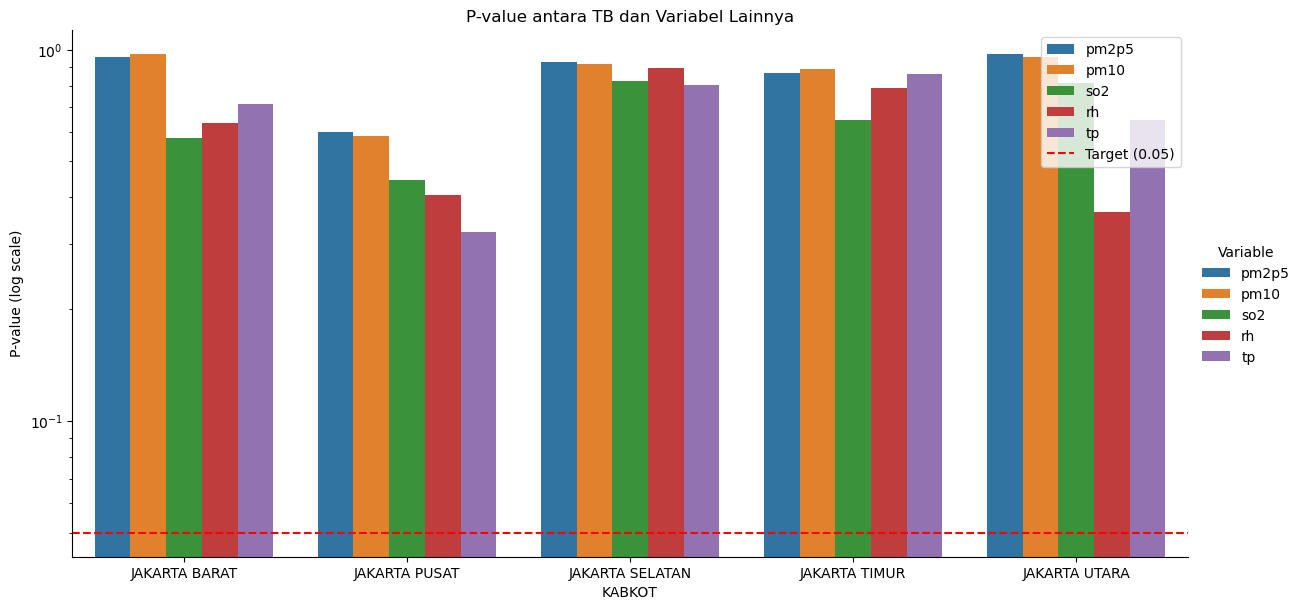

In [12]:
plt.figure(figsize=(12, 6))
plot = sns.catplot(data=df_pvalue_kabkot.melt(id_vars='KABKOT', var_name='Variable', value_name='P-value'),
                   x='KABKOT', y='P-value', hue='Variable', kind='bar', height=6, aspect=2)

# Menambahkan garis target
plt.yscale('log')  # Menggunakan skala logaritmik untuk p-value yang kecil
plt.title('P-value antara TB dan Variabel Lainnya')
plt.ylabel('P-value (log scale)')
plt.xlabel('KABKOT')

# Menambahkan garis target pada nilai 0.05
plt.axhline(y=0.05, color='r', linestyle='--', label='Target (0.05)')
plt.legend()

# Menampilkan plot
plt.show()

#menampilkan p-value variabel per kota
#garis batas adakah 0.05

(Nope!) Regression 

In [13]:
import statsmodels.api as sm

X = dataset[['pm2p5', 'pm10', 'so2', 'rh', 'tp']]
X = sm.add_constant(X)
y = dataset['tb']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     tb   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.379
Date:                Mon, 25 Mar 2024   Prob (F-statistic):             0.0388
Time:                        22:19:38   Log-Likelihood:                -2087.7
No. Observations:                 300   AIC:                             4187.
Df Residuals:                     294   BIC:                             4210.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        529.6248    467.780      1.132      0.2

Koefisien Regresi: -0.9913318716718436
Intercept: 704.606427801086
Mean Squared Error: 96318.80438254609


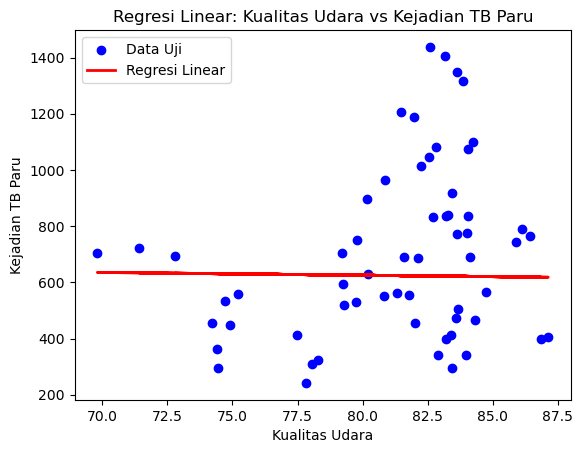

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Misal X adalah kualitas udara dan Y adalah kejadian TB paru
X = dataset['rh'].values.reshape(-1, 1)
Y = dataset['tb'].values

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, Y_train)

# Membuat prediksi menggunakan data uji
Y_pred = model.predict(X_test)

# Menampilkan koefisien regresi dan intercept
print('Koefisien Regresi:', model.coef_[0])
print('Intercept:', model.intercept_)

# Evaluasi kinerja model
mse = np.mean((Y_pred - Y_test)**2)
print('Mean Squared Error:', mse)

# Visualisasi hasil regresi
plt.scatter(X_test, Y_test, color='blue', label='Data Uji')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regresi Linear')
plt.xlabel('Kualitas Udara')
plt.ylabel('Kejadian TB Paru')
plt.title('Regresi Linear: Kualitas Udara vs Kejadian TB Paru')
plt.legend()
plt.show()